In [1]:
import pandas as pd
import os
# This is a comment
# These two lines install the pulp package on the syzygy server (or on your machine)
import sys
!{sys.executable} -m pip install pulp
import pulp
from pulp import *
import numpy as np
import matplotlib.pyplot as plt
import math

### 1 Data Set Up

In [2]:
notebook_path = os.path.abspath("Project.ipynb")
OC_path = os.path.join(os.path.dirname(notebook_path), "new_OC copy.csv")
PV_path = os.path.join(os.path.dirname(notebook_path), "new_PV copy.csv")
TP_path = os.path.join(os.path.dirname(notebook_path), "new_TP copy.csv")
DR_path = os.path.join(os.path.dirname(notebook_path), "Daily_Requirment.csv")
OC_df = pd.read_csv (OC_path)
PV_df = pd.read_csv (PV_path)
TP_df = pd.read_csv (TP_path)
DR_df = pd.read_csv (DR_path)

In [3]:
OC_df['Price'] = OC_df['Price'] * 0.75
TP_df['Price'] = TP_df['Price'] * 0.75
PV_df['Price'] = PV_df['Price'] * 0.75

### 1.1 original TP_df,OC_df,PV_df

In [4]:
#Totem Park dataframe 
TP_df

,ID,Name,Type,Price,Serving size,Calories,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbs,Dietary Fiber,Sugar,Protein
0,TP_M_1,Classic_Burger,Main,6.2175,1 Bugerbeef Patty,580,27.0,8.0,0.5,80,1700,59,7,11,26
1,TP_M_2,Cheese_Burger,Main,6.9675,1 Bugerbeef Patty,640,32.0,11.0,0.5,95,1810,59,7,11,29
2,TP_M_3,Classic_Chicken_Burger,Main,7.4925,1 Burger,670,22.0,7.0,0.0,110,1690,67,4,23,45
3,TP_M_4,Classic_Veggie_Burger,Main,6.7425,1 Burgerbeef Patty,580,30.0,3.5,0.0,15,1330,59,12,6,25
4,TP_M_5,Blue_Bacon_Burger,Main,10.4925,1 Burger,810,52.0,22.0,1.0,150,2030,39,5,7,36
5,TP_M_6,Spicy_Grilled_Cheese,Main,5.9925,1 Sandwich,880,53.0,33.0,2.0,140,1880,70,4,1,25
6,TP_M_7,Classic_Poutine,Main,6.2175,320,880,51.0,16.0,0.0,80,2510,79,6,0,24
7,TP_M_8,Mushroom_Pot_Pie,Main,6.7425,1 pie,610,38.0,10.0,0.5,60,730,58,12,16,12
8,TP_M_9,Steak&Mushroom_Pot_Pie,Main,5.9925,1 pie,480,27.0,10.0,0.0,55,720,42,6,9,21
9,TP_M_10,Spinach_Salad,Main,6.3675,26,790,71.0,15.0,0.0,5,460,16,5,7,24


In [5]:
#Place vanier dataframe
PV_df

,ID,Name,Type,Price,Serving size,Calories,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbs,Dietary Fiber,Sugar,Protein
0,PV_M_1,Alumni_Burger,Main,6.2175,1 portion,590,32.0,8.0,0.5,85,1010,52,7,5,25
1,PV_M_2,Classic_Grilled_Cheese,Main,5.9925,1 portion,570,55.0,33.0,1.5,145,380,7,1,0,13
2,PV_M_3,Lumberjack_Burger,Main,8.9925,1 portion,840,52.0,18.0,1.5,110,1880,58,6,12,35
3,PV_M_4,Cajun_Chicken_Burger,Main,9.7425,1 portion,500,9.0,1.0,0.0,120,920,56,4,14,46
4,PV_M_5,Beyond_Crunch_Burger,Main,8.2425,1 portion,700,37.0,11.0,0.0,25,1080,60,9,9,35
5,PV_M_6,Ultimate_Veggie_Burger,Main,7.4925,1 portion,640,28.0,8.0,0.0,15,570,80,15,14,21
6,PV_M_7,Mediterranean_Bowl,Main,5.9925,1 portion,740,49.0,8.0,0.0,30,1470,64,11,9,17
7,PV_M_8,Thai_Coconut_Bowl,Main,5.9925,1 portion,690,26.0,10.0,0.0,0,410,95,12,11,17
8,PV_M_9,Avocado_Spinach_Pasta,Main,6.7425,1 portion,1000,32.0,6.0,0.0,10,370,150,24,7,30
9,PV_M_10,Gather_Bowl,Main,6.7425,1 portion,960,52.0,6.0,0.0,0,440,106,17,13,23


In [6]:
#Ochard Commons dataframe
OC_df

,ID,Name,Type,Price,Serving Size,Calories,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbs,Dietary Fiber,Sugar,Protein
0,OC_M_1,Classic_Beef_Burger,Main,6.2175,320,570,29.0,8.0,0.5,80,1320,54,7,7,25
1,OC_M_2,Classic_Cheese_Burger,Main,6.9675,345,630,33.0,11.0,0.5,95,1430,54,7,7,28
2,OC_M_3,Chickpea_Burger,Main,8.2425,1 Burger,600,20.0,2.0,0.0,0,910,91,14,12,20
3,OC_M_4,Blackened_Chicken_Burger,Main,8.2425,1 Burger,530,20.0,4.5,0.0,100,1810,51,6,6,38
4,OC_M_5,Classic_Grilled_Cheese_Sandwich,Main,5.9925,1 Sandwich,900,56.0,31.0,1.5,130,1020,67,3,3,25
5,OC_M_6,Crispy_Fish_Sandwich,Main,8.9925,1 Sandwich,560,16.0,1.0,16.0,35,1220,80,7,11,24
6,OC_M_7,Poutine,Main,6.2175,400,880,51.0,16.0,0.0,80,2510,79,6,0,24
7,OC_M_8,Baja_Salad,Main,7.4925,380,800,69.0,8.0,0.0,15,460,34,9,7,17
8,OC_M_9,Kale_Caesar,Main,6.7425,210,400,24.0,6.0,0.0,35,1010,33,5,3,15
9,OC_M_10,Southwest_Bowl,Main,6.7425,1. bowl,880,59.0,4.0,0.0,15,740,64,13,16,11


### 1.2 DR_df

In [7]:
#Daily nutrition requirement dataframe
DR_df

,Nutrition,Daily_Requirement_LB,Daily_Requirement_UB
0,Calorie (kcal),1250.0,3000.00
1,Total fat (g),59.0,103.00
2,Saturated fat (g),0.0,22.00
3,Trans fat (g),0.0,2.00
4,Cholesterol (mg),0.0,300.00
5,Sodium (mg),0.0,2300.00
6,Total carbs (g),225.0,325.00
7,Dietary fiber (g),21.0,NaN
8,Sugar (g),0.0,24.00
9,Protein (g),27.2,95.18


### 2 Construct Constraints in DR_df

In [8]:
#construct calorie nutritient value constraints
dinner_ratio = 2.2
cal_to_kg = 0.129598
sugar_cal_to_g = 0.25
protein_cal_to_g = 0.25
fat_cal_to_g = 1/9

Calories_LB = DR_df["Daily_Requirement_LB"][0]/dinner_ratio
Calories_UB = DR_df["Daily_Requirement_UB"][0]/dinner_ratio
Total_Fat_LB = Calories_LB * fat_cal_to_g * 0.2
Total_Fat_UB = Calories_UB * fat_cal_to_g * 0.35
Saturated_Fat_LB = 0
Saturated_Fat_UB = Calories_UB * fat_cal_to_g * 0.1
Trans_Fat_LB = 0
Trans_Fat_UB = Calories_UB * fat_cal_to_g * 0.01
Cholesterol_LB = 0
Cholesterol_UB = DR_df["Daily_Requirement_UB"][4]/dinner_ratio
Sodium_LB = 0
Sodium_UB = DR_df["Daily_Requirement_UB"][5]/dinner_ratio
Total_Carbs_LB = DR_df["Daily_Requirement_LB"][6]/dinner_ratio
Total_Carbs_UB = DR_df["Daily_Requirement_UB"][6]/dinner_ratio
Dietary_Fiber_LB = DR_df["Daily_Requirement_LB"][7]/dinner_ratio
Sugar_LB = 0
Sugar_UB = Calories_UB*0.1*sugar_cal_to_g
Protein_LB = Calories_LB *0.1 * protein_cal_to_g
Protein_UB = Calories_UB * 0.35 * protein_cal_to_g

Calories_constraint_tuple = (Calories_LB,Calories_UB)
Total_Fat_constraint_tuple = (Total_Fat_LB,Total_Fat_UB)
Saturated_Fat_constraint_tuple = (Saturated_Fat_LB,Saturated_Fat_UB)
Trans_Fat_constraint_tuple = (Trans_Fat_LB,Trans_Fat_UB)
Cholesterol_constraint_tuple = (Cholesterol_LB,Cholesterol_UB)
Sodium_constraint_tuple = (Sodium_LB,Sodium_UB)
Total_Carbs_constraint_tuple = (Total_Carbs_LB,Total_Carbs_UB)
Dietary_Fiber_constraint_tuple = (Dietary_Fiber_LB,)
Sugar_constraint_tuple = (Sugar_LB,Sugar_UB)
Protein_constraint_tuple = (Protein_LB,Protein_UB)

limit_constraint_tuples = [Calories_constraint_tuple,
                           Total_Fat_constraint_tuple,
                           Saturated_Fat_constraint_tuple,
                           Trans_Fat_constraint_tuple,
                           Cholesterol_constraint_tuple,
                           Sodium_constraint_tuple,
                           Total_Carbs_constraint_tuple,
                           Dietary_Fiber_constraint_tuple,
                           Sugar_constraint_tuple,
                           Protein_constraint_tuple]
constrant_df = pd.DataFrame(limit_constraint_tuples, columns = ['Constraint_LB', 'Constraint_UB'])

In [9]:
#add nutrition value constraints to DR_df
DR_df = pd.concat([DR_df, constrant_df], axis=1)
DR_df

,Nutrition,Daily_Requirement_LB,Daily_Requirement_UB,Constraint_LB,Constraint_UB
0,Calorie (kcal),1250.0,3000.00,568.181818,1363.636364
1,Total fat (g),59.0,103.00,12.626263,53.030303
2,Saturated fat (g),0.0,22.00,0.000000,15.151515
3,Trans fat (g),0.0,2.00,0.000000,1.515152
4,Cholesterol (mg),0.0,300.00,0.000000,136.363636
5,Sodium (mg),0.0,2300.00,0.000000,1045.454545
6,Total carbs (g),225.0,325.00,102.272727,147.727273
7,Dietary fiber (g),21.0,NaN,9.545455,NaN
8,Sugar (g),0.0,24.00,0.000000,34.090909
9,Protein (g),27.2,95.18,14.204545,119.318182


### 3 Nutrition Value

In [10]:
#Creating a normal distritution function
def normal_dist(x, mean, sd):
    prob_density = 1/(sd * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * sd**2))
    return prob_density

# a map function map the Gaussian value in range(0,1)
def map_01(x,in_max):
    return x/(in_max-0)

### 3.1 total carbs nutrition point & plot

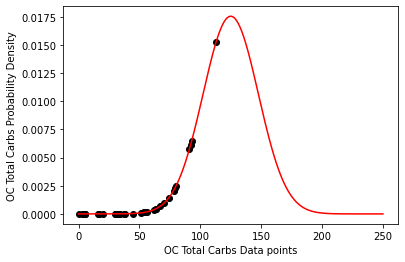

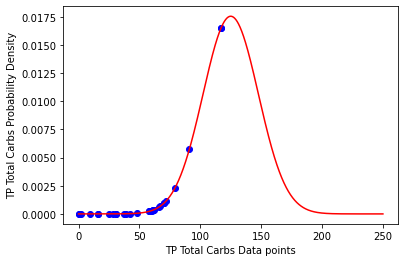

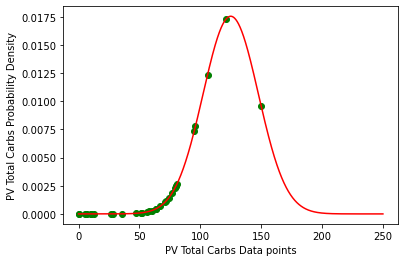

In [11]:
Total_Carbs_avg = (DR_df["Constraint_LB"][6] + DR_df["Constraint_UB"][6])/2
Total_Carbs_sigma = DR_df["Constraint_UB"][6] - Total_Carbs_avg
OC_Total_Carbs_points = OC_df["Total Carbs"]
TP_Total_Carbs_points = TP_df["Total Carbs"]
PV_Total_Carbs_points = PV_df["Total Carbs"]

interval = np.linspace(0,250,2000)
Total_Carbs_pdf_line = normal_dist(interval,Total_Carbs_avg,Total_Carbs_sigma)
Total_Carbs_max_line = max(Total_Carbs_pdf_line)
OC_Total_Carbs_pdf_dots = normal_dist(OC_Total_Carbs_points,Total_Carbs_avg,Total_Carbs_sigma)
TP_Total_Carbs_pdf_dots = normal_dist(TP_Total_Carbs_points,Total_Carbs_avg,Total_Carbs_sigma)
PV_Total_Carbs_pdf_dots = normal_dist(PV_Total_Carbs_points,Total_Carbs_avg,Total_Carbs_sigma)

OC_Total_Carbs_mapped_dots_arr = map_01(OC_Total_Carbs_pdf_dots,Total_Carbs_max_line)
TP_Total_Carbs_mapped_dots_arr = map_01(TP_Total_Carbs_pdf_dots,Total_Carbs_max_line)
PV_Total_Carbs_mapped_dots_arr = map_01(PV_Total_Carbs_pdf_dots,Total_Carbs_max_line)

OC_df["Total Carbs Nutrition Point"] = OC_Total_Carbs_mapped_dots_arr
TP_df["Total Carbs Nutrition Point"] = TP_Total_Carbs_mapped_dots_arr
PV_df["Total Carbs Nutrition Point"] = PV_Total_Carbs_mapped_dots_arr

#Plotting the Results
plt.plot(OC_Total_Carbs_points,OC_Total_Carbs_pdf_dots, 'o', color='black');
plt.plot(interval,Total_Carbs_pdf_line, color = 'red')
plt.xlabel('OC Total Carbs Data points')
plt.ylabel('OC Total Carbs Probability Density')
plt.show()

plt.plot(TP_Total_Carbs_points,TP_Total_Carbs_pdf_dots, 'o', color='blue');
plt.plot(interval,Total_Carbs_pdf_line, color = 'red')
plt.xlabel('TP Total Carbs Data points')
plt.ylabel('TP Total Carbs Probability Density')
plt.show()

plt.plot(PV_Total_Carbs_points,PV_Total_Carbs_pdf_dots, 'o', color='green');
plt.plot(interval,Total_Carbs_pdf_line, color = 'red')
plt.xlabel('PV Total Carbs Data points')
plt.ylabel('PV Total Carbs Probability Density')
plt.show()

### 3.2 total fat nutritient point & plot

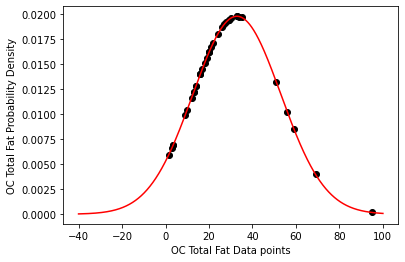

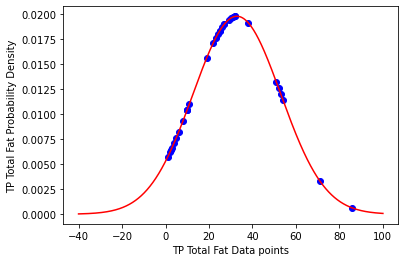

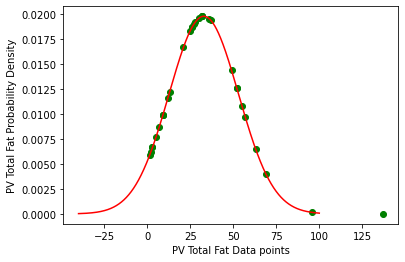

In [12]:
Total_Fat_avg = (DR_df["Constraint_LB"][1] + DR_df["Constraint_UB"][1])/2
Total_Fat_sigma = DR_df["Constraint_UB"][1] - Total_Fat_avg
OC_Total_Fat_points = OC_df["Total Fat"]
TP_Total_Fat_points = TP_df["Total Fat"]
PV_Total_Fat_points = PV_df["Total Fat"]

interval = np.linspace(-40,100,2000)
Total_Fat_pdf_line = normal_dist(interval,Total_Fat_avg,Total_Fat_sigma)
Total_Fat_max_line = max(Total_Fat_pdf_line)
OC_Total_Fat_pdf_dots = normal_dist(OC_Total_Fat_points,Total_Fat_avg,Total_Fat_sigma)
TP_Total_Fat_pdf_dots = normal_dist(TP_Total_Fat_points,Total_Fat_avg,Total_Fat_sigma)
PV_Total_Fat_pdf_dots = normal_dist(PV_Total_Fat_points,Total_Fat_avg,Total_Fat_sigma)

OC_Total_Fat_mapped_dots_arr = map_01(OC_Total_Fat_pdf_dots,Total_Fat_max_line)
TP_Total_Fat_mapped_dots_arr = map_01(TP_Total_Fat_pdf_dots,Total_Fat_max_line)
PV_Total_Fat_mapped_dots_arr = map_01(PV_Total_Fat_pdf_dots,Total_Fat_max_line)

OC_df["Total Fat Nutrition Point"] = OC_Total_Fat_mapped_dots_arr
TP_df["Total Fat Nutrition Point"] = TP_Total_Fat_mapped_dots_arr
PV_df["Total Fat Nutrition Point"] = PV_Total_Fat_mapped_dots_arr

#Plotting the Results
plt.plot(OC_Total_Fat_points,OC_Total_Fat_pdf_dots, 'o', color='black');
plt.plot(interval,Total_Fat_pdf_line, color = 'red')
plt.xlabel('OC Total Fat Data points')
plt.ylabel('OC Total Fat Probability Density')
plt.show()

plt.plot(TP_Total_Fat_points,TP_Total_Fat_pdf_dots, 'o', color='blue');
plt.plot(interval,Total_Fat_pdf_line, color = 'red')
plt.xlabel('TP Total Fat Data points')
plt.ylabel('TP Total Fat Probability Density')
plt.show()

plt.plot(PV_Total_Fat_points,PV_Total_Fat_pdf_dots, 'o', color='green');
plt.plot(interval,Total_Fat_pdf_line, color = 'red')
plt.xlabel('PV Total Fat Data points')
plt.ylabel('PV Total Fat Probability Density')
plt.show()

### 3.3 protein nutritient point & plot

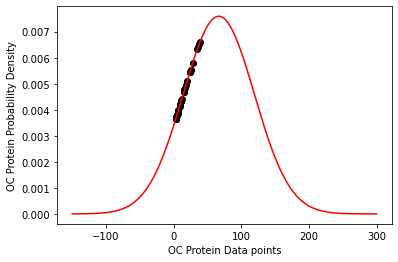

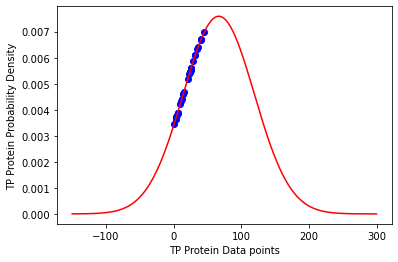

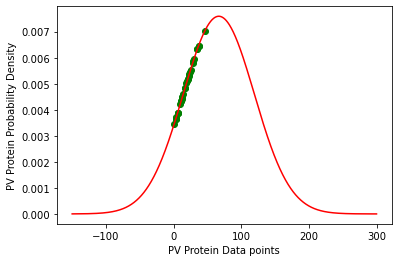

In [13]:
Protein_avg = (DR_df["Constraint_LB"][9] + DR_df["Constraint_UB"][9])/2
Protein_sigma = DR_df["Constraint_UB"][9] - Protein_avg
OC_Protein_points = OC_df["Protein"]
TP_Protein_points = TP_df["Protein"]
PV_Protein_points = PV_df["Protein"]

interval = np.linspace(-150,300,2000)
Protein_pdf_line = normal_dist(interval,Protein_avg,Protein_sigma)
Protein_max_line = max(Protein_pdf_line)
OC_Protein_pdf_dots = normal_dist(OC_Protein_points,Protein_avg,Protein_sigma)
TP_Protein_pdf_dots = normal_dist(TP_Protein_points,Protein_avg,Protein_sigma)
PV_Protein_pdf_dots = normal_dist(PV_Protein_points,Protein_avg,Protein_sigma)

OC_Protein_mapped_dots_arr = map_01(OC_Protein_pdf_dots,Protein_max_line)
TP_Protein_mapped_dots_arr = map_01(TP_Protein_pdf_dots,Protein_max_line)
PV_Protein_mapped_dots_arr = map_01(PV_Protein_pdf_dots,Protein_max_line)

OC_df["Protein Nutrition Point"] = OC_Protein_mapped_dots_arr
TP_df["Protein Nutrition Point"] = TP_Protein_mapped_dots_arr
PV_df["Protein Nutrition Point"] = PV_Protein_mapped_dots_arr

#Plotting the Results
plt.plot(OC_Protein_points,OC_Protein_pdf_dots, 'o', color='black');
plt.plot(interval,Protein_pdf_line, color = 'red')
plt.xlabel('OC Protein Data points')
plt.ylabel('OC Protein Probability Density')
plt.show()

plt.plot(TP_Protein_points,TP_Protein_pdf_dots, 'o', color='blue');
plt.plot(interval,Protein_pdf_line, color = 'red')
plt.xlabel('TP Protein Data points')
plt.ylabel('TP Protein Probability Density')
plt.show()

plt.plot(PV_Protein_points, PV_Protein_pdf_dots, 'o', color='green');
plt.plot(interval,Protein_pdf_line, color = 'red')
plt.xlabel('PV Protein Data points')
plt.ylabel('PV Protein Probability Density')
plt.show()

### 3.4 nutritiosaturated fat, trans fat, cholesterol, sugar, sodium, dietary fiber

In [14]:
#maxinum/mininum  of OC,TP, PV restaraunt, use for calculate uniform distribution function below
OC_So = OC_df["Sodium"]
TP_So = TP_df["Sodium"]
PV_So = PV_df["Sodium"]
sodium_arr = [*OC_So, *TP_So, *PV_So]
max_soduim = max(sodium_arr)

OC_S = OC_df["Sugar"]
TP_S = TP_df["Sugar"]
PV_S = PV_df["Sugar"]
sugar_arr = [*OC_S, *TP_S, *PV_S]
max_sugar = max(sugar_arr)

OC_C = OC_df["Cholesterol"]
TP_C = TP_df["Cholesterol"]
PV_C = PV_df["Cholesterol"]
Cholesterol_arr = [*OC_C, *TP_C, *PV_C]
max_Cholesterol= max(Cholesterol_arr)

OC_TF = OC_df["Trans Fat"]
TP_TF = TP_df["Trans Fat"]
PV_TF = PV_df["Trans Fat"]
trans_fat_arr = [*OC_TF, *TP_TF, *PV_TF]
max_trans_fat = max(trans_fat_arr)

OC_SF = OC_df["Saturated Fat"]
TP_SF = TP_df["Saturated Fat"]
PV_SF = PV_df["Saturated Fat"]
saturated_fat_arr = [*OC_SF, *TP_SF, *PV_SF]
max_saturated_fat = max(saturated_fat_arr)

OC_So = OC_df["Sodium"]
TP_So = TP_df["Sodium"]
PV_So = PV_df["Sodium"]
sodium_arr = [*OC_So, *TP_So, *PV_So]
max_soduim = max(sodium_arr)

OC_S = OC_df["Sugar"]
TP_S = TP_df["Sugar"]
PV_S = PV_df["Sugar"]
sugar_arr = [*OC_S, *TP_S, *PV_S]
max_sugar = max(sugar_arr)

OC_C = OC_df["Cholesterol"]
TP_C = TP_df["Cholesterol"]
PV_C = PV_df["Cholesterol"]
Cholesterol_arr = [*OC_C, *TP_C, *PV_C]
max_Cholesterol= max(Cholesterol_arr)

OC_TF = OC_df["Trans Fat"]
TP_TF = TP_df["Trans Fat"]
PV_TF = PV_df["Trans Fat"]
trans_fat_arr = [*OC_TF, *TP_TF, *PV_TF]
max_trans_fat = max(trans_fat_arr)

OC_SF = OC_df["Saturated Fat"]
TP_SF = TP_df["Saturated Fat"]
PV_SF = PV_df["Saturated Fat"]
saturated_fat_arr = [*OC_SF, *TP_SF, *PV_SF]
max_saturated_fat = max(saturated_fat_arr)

# construct uniform function for saturated fat, trans fat, cholesterol, sugar, sodium
def uniform_nutrition_point(max_value, kind, df):
    nutrition_point_arr = (-1/max_value)*df[kind] + 1
    return nutrition_point_arr

# construct fiber nutrition function 
def fiber_nutrition_point(arr):
    fiber_arr = []
    fiber_bound = DR_df["Constraint_LB"][7]
    for i in arr:
        if (i >= fiber_bound):
            fiber_arr.append(1)
        else:
            nutrition_point = (1/fiber_bound)*i
            fiber_arr.append(nutrition_point)
    return fiber_arr    
    

#calculate nutrition point for saturated fat, trans fat, cholesterol, sugar, sodium, dietary fiber
OC_SF_point = uniform_nutrition_point(max_saturated_fat,"Saturated Fat",OC_df)
TP_SF_point = uniform_nutrition_point(max_saturated_fat,"Saturated Fat",TP_df)
PV_SF_point = uniform_nutrition_point(max_saturated_fat,"Saturated Fat",PV_df)

OC_TF_point = uniform_nutrition_point(max_trans_fat,"Trans Fat",OC_df)
TP_TF_point = uniform_nutrition_point(max_trans_fat,"Trans Fat",TP_df)
PV_TF_point = uniform_nutrition_point(max_trans_fat,"Trans Fat",PV_df)

OC_C_point = uniform_nutrition_point(max_Cholesterol,"Cholesterol",OC_df)
TP_C_point = uniform_nutrition_point(max_Cholesterol,"Cholesterol",TP_df)
PV_C_point = uniform_nutrition_point(max_Cholesterol,"Cholesterol",PV_df)

OC_S_point = uniform_nutrition_point(max_sugar,"Sugar",OC_df)
TP_S_point = uniform_nutrition_point(max_sugar,"Sugar",TP_df)
PV_S_point = uniform_nutrition_point(max_sugar,"Sugar",PV_df)

OC_So_point = uniform_nutrition_point(max_soduim,"Sodium",OC_df)
TP_So_point = uniform_nutrition_point(max_soduim,"Sodium",TP_df)
PV_So_point = uniform_nutrition_point(max_soduim,"Sodium",PV_df)

OC_F_point = fiber_nutrition_point(OC_df["Dietary Fiber"])
TP_F_point = fiber_nutrition_point(TP_df["Dietary Fiber"])
PV_F_point = fiber_nutrition_point(PV_df["Dietary Fiber"])

OC_df["Sugar Nutrition Point"] = OC_S_point
TP_df["Sugar Nutrition Point"] = TP_S_point
PV_df["Sugar Nutrition Point"] = PV_S_point

OC_df["Sodium Nutrition Point"] = OC_So_point
TP_df["Sodium Nutrition Point"] = TP_So_point
PV_df["Sodium Nutrition Point"] = PV_So_point

OC_df["Trans Fat Nutrition Point"] = OC_TF_point
TP_df["Trans Fat Nutrition Point"] = TP_TF_point
PV_df["Trans Fat Nutrition Point"] = PV_TF_point

OC_df["Saturated Fat Nutrition Point"] = OC_SF_point
TP_df["Saturated Fat Nutrition Point"] = TP_SF_point
PV_df["Saturated Fat Nutrition Point"] = PV_SF_point

OC_df["Cholesterol Nutrition Point"] = OC_C_point
TP_df["Cholesterol Nutrition Point"] = TP_C_point
PV_df["Cholesterol Nutrition Point"] = PV_C_point

OC_df["Dietary Fiber Nutrition Point"] = OC_F_point
TP_df["Dietary Fiber Nutrition Point"] = TP_F_point
PV_df["Dietary Fiber Nutrition Point"] = PV_F_point

#calculate nutrition point for saturated fat, trans fat, cholesterol, sugar, sodium, dietary fiber
OC_SF_point = uniform_nutrition_point(max_saturated_fat,"Saturated Fat",OC_df)
TP_SF_point = uniform_nutrition_point(max_saturated_fat,"Saturated Fat",TP_df)
PV_SF_point = uniform_nutrition_point(max_saturated_fat,"Saturated Fat",PV_df)

OC_TF_point = uniform_nutrition_point(max_trans_fat,"Trans Fat",OC_df)
TP_TF_point = uniform_nutrition_point(max_trans_fat,"Trans Fat",TP_df)
PV_TF_point = uniform_nutrition_point(max_trans_fat,"Trans Fat",PV_df)

OC_C_point = uniform_nutrition_point(max_Cholesterol,"Cholesterol",OC_df)
TP_C_point = uniform_nutrition_point(max_Cholesterol,"Cholesterol",TP_df)
PV_C_point = uniform_nutrition_point(max_Cholesterol,"Cholesterol",PV_df)

OC_S_point = uniform_nutrition_point(max_sugar,"Sugar",OC_df)
TP_S_point = uniform_nutrition_point(max_sugar,"Sugar",TP_df)
PV_S_point = uniform_nutrition_point(max_sugar,"Sugar",PV_df)

OC_So_point = uniform_nutrition_point(max_soduim,"Sodium",OC_df)
TP_So_point = uniform_nutrition_point(max_soduim,"Sodium",TP_df)
PV_So_point = uniform_nutrition_point(max_soduim,"Sodium",PV_df)

OC_F_point = fiber_nutrition_point(OC_df["Dietary Fiber"])
TP_F_point = fiber_nutrition_point(TP_df["Dietary Fiber"])
PV_F_point = fiber_nutrition_point(PV_df["Dietary Fiber"])

OC_df["Sugar Nutrition Point"] = OC_S_point
TP_df["Sugar Nutrition Point"] = TP_S_point
PV_df["Sugar Nutrition Point"] = PV_S_point

OC_df["Sodium Nutrition Point"] = OC_So_point
TP_df["Sodium Nutrition Point"] = TP_So_point
PV_df["Sodium Nutrition Point"] = PV_So_point

OC_df["Trans Fat Nutrition Point"] = OC_TF_point
TP_df["Trans Fat Nutrition Point"] = TP_TF_point
PV_df["Trans Fat Nutrition Point"] = PV_TF_point

OC_df["Saturated Fat Nutrition Point"] = OC_SF_point
TP_df["Saturated Fat Nutrition Point"] = TP_SF_point
PV_df["Saturated Fat Nutrition Point"] = PV_SF_point

OC_df["Cholesterol Nutrition Point"] = OC_C_point
TP_df["Cholesterol Nutrition Point"] = TP_C_point
PV_df["Cholesterol Nutrition Point"] = PV_C_point

OC_df["Dietary Fiber Nutrition Point"] = OC_F_point
TP_df["Dietary Fiber Nutrition Point"] = TP_F_point
PV_df["Dietary Fiber Nutrition Point"] = PV_F_point

### 3.6 calculate nutrition value and coefficient 

In [15]:
def calculate_nutrition_value(df):
    df["Nutrition Value"] = df["Total Fat Nutrition Point"] + df["Saturated Fat Nutrition Point"] + df["Trans Fat Nutrition Point"] + df["Cholesterol Nutrition Point"] + df["Sodium Nutrition Point"] + df["Total Carbs Nutrition Point"] + df["Dietary Fiber Nutrition Point"]+df["Sugar Nutrition Point"]+ df["Protein Nutrition Point"]
    
def coefficient(df):
    df["Coefficient"] = df["Nutrition Value"] / df["Price"]
    
calculate_nutrition_value(OC_df)
calculate_nutrition_value(PV_df)
calculate_nutrition_value(TP_df)
coefficient(OC_df)
coefficient(PV_df)
coefficient(TP_df)

### 4 define decision variable name 

In [16]:
def type_id(t):
    if (t == "M"):
        return 1
    else:
        return 2

def res_id(r):
    if (r == "TP"):
        return 1
    elif (r == "OC"):
        return 2
    else:
        return 3
    
def index_id(i):
    return i 

def create_variable_name(df):
    first_arr = []
    second_arr = []
    third_arr = []
    for i in df["ID"]:
        items_arr = i.split('_')
        r = res_id(items_arr[0])
        t = type_id(items_arr[1])
        ii = index_id(items_arr[2])
        first_day_index = str(t)+ "_" + str(r)+ "_" +str(ii)+ "_" +str(1)
        second_day_index = str(t)+ "_" + str(r)+ "_" +str(ii)+ "_" +str(2)
        third_day_index = str(t)+ "_" + str(r)+ "_" +str(ii)+ "_" +str(3)
        first_day_var_name = "x" + "_" + first_day_index
        second_day_var_name = "x" + "_" + second_day_index
        third_day_var_name = "x" + "_" + third_day_index

        first_arr.append(first_day_var_name)
        second_arr.append(second_day_var_name)
        third_arr.append(third_day_var_name)
    df["1st Day Variable Name"] = first_arr
    df["2nd Day Variable Name"] = second_arr
    df["3rd Day Variable Name"] = third_arr
    
create_variable_name(OC_df)
create_variable_name(TP_df)
create_variable_name(PV_df)

### 5 LP Problems Set Up

### 5.1 create three LP max problem

In [17]:
LP_TP_OC_PV = pulp.LpProblem('Maximum_three_day_meals_each_in_TP_OC_PV', LpMaximize) 
LP_TP = pulp.LpProblem('Maximum_three_day_meals_in_TP', LpMaximize) 
LP_OC = pulp.LpProblem('Maximum_three_day_meals_in_OC', LpMaximize)  
LP_PV = pulp.LpProblem('Maximum_three_day_meals_in_PV', LpMaximize)  

### 5.2 define LP decision variable

In [18]:
PV_main_df = PV_df.loc[PV_df['Type'] == 'Main']
PV_main_df = PV_main_df[["1st Day Variable Name","2nd Day Variable Name", "3rd Day Variable Name"]]
PV_main_1st_vars = LpVariable.dicts("PVM",PV_main_df["1st Day Variable Name"], lowBound=0,upBound=1,cat="Integer")
PV_main_2nd_vars = LpVariable.dicts("PVM",PV_main_df["2nd Day Variable Name"], lowBound=0,upBound=1,cat="Integer")
PV_main_3rd_vars = LpVariable.dicts("PVM",PV_main_df["3rd Day Variable Name"], lowBound=0,upBound=1,cat="Integer")

TP_main_df = TP_df.loc[TP_df['Type'] == 'Main']
TP_main_df = TP_main_df[["1st Day Variable Name","2nd Day Variable Name", "3rd Day Variable Name"]]
TP_main_1st_vars = LpVariable.dicts("TPM",TP_main_df["1st Day Variable Name"], lowBound=0,upBound=1,cat="Integer")
TP_main_2nd_vars = LpVariable.dicts("TPM",TP_main_df["2nd Day Variable Name"], lowBound=0,upBound=1,cat="Integer")
TP_main_3rd_vars = LpVariable.dicts("TPM",TP_main_df["3rd Day Variable Name"], lowBound=0,upBound=1,cat="Integer")

OC_main_df = OC_df.loc[OC_df['Type'] == 'Main']
OC_main_df = OC_main_df[["1st Day Variable Name","2nd Day Variable Name", "3rd Day Variable Name"]]
OC_main_1st_vars = LpVariable.dicts("OCM",OC_main_df["1st Day Variable Name"], lowBound=0,upBound=1,cat="Integer")
OC_main_2nd_vars = LpVariable.dicts("OCM",OC_main_df["2nd Day Variable Name"], lowBound=0,upBound=1,cat="Integer")
OC_main_3rd_vars = LpVariable.dicts("OCM",OC_main_df["3rd Day Variable Name"], lowBound=0,upBound=1,cat="Integer")

PV_side_df = PV_df.loc[PV_df['Type'] == 'Side']
PV_side_df = PV_side_df[["1st Day Variable Name","2nd Day Variable Name", "3rd Day Variable Name"]]
PV_side_1st_vars = LpVariable.dicts("PVS",PV_side_df["1st Day Variable Name"], lowBound=0,upBound=1,cat="Integer")
PV_side_2nd_vars = LpVariable.dicts("PVS",PV_side_df["2nd Day Variable Name"], lowBound=0,upBound=1,cat="Integer")
PV_side_3rd_vars = LpVariable.dicts("PVS",PV_side_df["3rd Day Variable Name"], lowBound=0,upBound=1,cat="Integer")

TP_side_df = TP_df.loc[TP_df['Type'] == 'Side']
TP_side_df = TP_side_df[["1st Day Variable Name","2nd Day Variable Name", "3rd Day Variable Name"]]
TP_side_1st_vars = LpVariable.dicts("TPS",TP_side_df["1st Day Variable Name"], lowBound=0,upBound=1,cat="Integer")
TP_side_2nd_vars = LpVariable.dicts("TPS",TP_side_df["2nd Day Variable Name"], lowBound=0,upBound=1,cat="Integer")
TP_side_3rd_vars = LpVariable.dicts("TPS",TP_side_df["3rd Day Variable Name"], lowBound=0,upBound=1,cat="Integer")

OC_side_df = OC_df.loc[OC_df['Type'] == 'Side']
OC_side_df = OC_side_df[["1st Day Variable Name","2nd Day Variable Name", "3rd Day Variable Name"]]
OC_side_1st_vars = LpVariable.dicts("OCS",OC_side_df["1st Day Variable Name"], lowBound=0,upBound=1,cat="Integer")
OC_side_2nd_vars = LpVariable.dicts("OCS",OC_side_df["2nd Day Variable Name"], lowBound=0,upBound=1,cat="Integer")
OC_side_3rd_vars = LpVariable.dicts("OCS",OC_side_df["3rd Day Variable Name"], lowBound=0,upBound=1,cat="Integer")

TP_1st_vars = {**TP_main_1st_vars, **TP_side_1st_vars}
TP_2nd_vars = {**TP_main_2nd_vars, **TP_side_2nd_vars}
TP_3rd_vars = {**TP_main_3rd_vars, **TP_side_3rd_vars}

PV_1st_vars = {**PV_main_1st_vars, **PV_side_1st_vars}
PV_2nd_vars = {**PV_main_2nd_vars, **PV_side_2nd_vars}
PV_3rd_vars = {**PV_main_3rd_vars, **PV_side_3rd_vars}

OC_1st_vars = {**OC_main_1st_vars, **OC_side_1st_vars}
OC_2nd_vars = {**OC_main_2nd_vars, **OC_side_2nd_vars}
OC_3rd_vars = {**OC_main_3rd_vars, **OC_side_3rd_vars}

### 5.3 nutrition constraint function

In [19]:
def nutrition_constraint(LP, dfs,LB,UB,kind):
    day_arr = ["1st","2nd","3rd"]
        
    for (df,d) in list(zip(dfs,day_arr)):
        dfname = str(df).split('_')[0]

        constraint_UB_explain = f"UB {kind} constraints for {str(dfname)} in {d} day"
        constraint_LB_explain = f"LB {kind} constraints for {str(dfname)} in {d} day"
        constraint_kind_name = str(dfname) + "_" + str(kind) + "_constraint"

        which_day_var_name = f"{d} Day Variable Name"

        if str(df) == str(TP_df):
            if d == "1st":
                constraint_kind_name_arr = [df.loc[df[which_day_var_name] == str(i), kind].values[0]*TP_1st_vars[i] for i in df[which_day_var_name]] 
            elif d == "2nd":
                constraint_kind_name_arr = [df.loc[df[which_day_var_name] == str(i), kind].values[0]*TP_2nd_vars[i] for i in df[which_day_var_name]] 
            else:
                constraint_kind_name_arr = [df.loc[df[which_day_var_name] == str(i), kind].values[0]*TP_3rd_vars[i] for i in df[which_day_var_name]]
        if str(df) == str(OC_df):
            if d == "1st":
                constraint_kind_name_arr = [df.loc[df[which_day_var_name] == str(i), kind].values[0]*OC_1st_vars[i] for i in df[which_day_var_name]] 
            elif d == "2nd":
                constraint_kind_name_arr = [df.loc[df[which_day_var_name] == str(i), kind].values[0]*OC_2nd_vars[i] for i in df[which_day_var_name]] 
            else:
                constraint_kind_name_arr = [df.loc[df[which_day_var_name] == str(i), kind].values[0]*OC_3rd_vars[i] for i in df[which_day_var_name]] 
        if str(df) == str(PV_df):
            if d == "1st":
                constraint_kind_name_arr = [df.loc[df[which_day_var_name] == str(i), kind].values[0]*PV_1st_vars[i] for i in df[which_day_var_name]] 
            elif d == "2nd":
                constraint_kind_name_arr = [df.loc[df[which_day_var_name] == str(i), kind].values[0]*PV_2nd_vars[i] for i in df[which_day_var_name]] 
            else:
                constraint_kind_name_arr = [df.loc[df[which_day_var_name] == str(i), kind].values[0]*PV_3rd_vars[i] for i in df[which_day_var_name]] 

        if UB>=0:
            LP += lpSum([constraint_kind_name_arr]) <= UB
        LP += lpSum([constraint_kind_name_arr]) >= LB

### 6 Implement LP problem 

### 6.1 three days have meals at TP, OC, PV 

### 6.1.1 objective function 

In [20]:
TP_obj = [TP_df.loc[TP_df['1st Day Variable Name'] == i, 'Coefficient'].values[0]*TP_1st_vars[i] for i in TP_df['1st Day Variable Name']]
OC_obj = [OC_df.loc[OC_df['2nd Day Variable Name'] == i, 'Coefficient'].values[0]*OC_2nd_vars[i] for i in OC_df['2nd Day Variable Name']]
PV_obj = [PV_df.loc[PV_df['3rd Day Variable Name'] == i, 'Coefficient'].values[0]*PV_3rd_vars[i] for i in PV_df['3rd Day Variable Name']]

LP_TP_OC_PV += lpSum([TP_obj,OC_obj,PV_obj]), "Total Cost of three day meals separate in TP, OC, PV"

### 6.1.2 constraints

In [21]:
#price constraint 
TP_price_constraint = [TP_df.loc[TP_df['1st Day Variable Name'] == i, 'Price'].values[0]*TP_1st_vars[i] for i in TP_df['1st Day Variable Name']]
OC_price_constraint = [OC_df.loc[OC_df['2nd Day Variable Name'] == i, 'Price'].values[0]*OC_2nd_vars[i] for i in OC_df['2nd Day Variable Name']]
PV_price_constraint = [PV_df.loc[PV_df['3rd Day Variable Name'] == i, 'Price'].values[0]*PV_3rd_vars[i] for i in PV_df['3rd Day Variable Name']]
LP_TP_OC_PV += lpSum([TP_price_constraint,OC_price_constraint,PV_price_constraint]) <= 26.7/dinner_ratio *3, "Price constraints for TP, OC, PV"

In [22]:
#other constraints to make sure our assumption is valid
LP_TP_OC_PV += lpSum(TP_main_1st_vars[str(TP_main_df.iat[i,0])] for i in range(len(TP_main_1st_vars))) == 1, "TP one main in first day"
LP_TP_OC_PV += lpSum(TP_side_1st_vars[str(TP_side_df.iat[i,0])] for i in range(len(TP_side_1st_vars))) == 1, "TP one side in first day"

LP_TP_OC_PV += lpSum(OC_main_2nd_vars[str(OC_main_df.iat[i,1])] for i in range(len(OC_main_2nd_vars))) == 1, "OC one main in second day"
LP_TP_OC_PV += lpSum(OC_side_2nd_vars[str(OC_side_df.iat[i,1])] for i in range(len(OC_side_2nd_vars))) == 1, "OC one side in second day"

LP_TP_OC_PV += lpSum(PV_main_3rd_vars[str(PV_main_df.iat[i,2])] for i in range(len(PV_main_3rd_vars))) == 1, "PV one main in third day"
LP_TP_OC_PV += lpSum(PV_side_3rd_vars[str(PV_side_df.iat[i,2])] for i in range(len(PV_side_3rd_vars))) == 1, "PV one side in third day" 

In [23]:
#nutrition constraint
Calorie_LB = DR_df["Constraint_LB"][0]
Calorie_UB = DR_df["Constraint_UB"][0]
Total_Fat_LB = DR_df["Constraint_LB"][1]
Total_Fat_UB = DR_df["Constraint_UB"][1]
Saturated_Fat_LB = DR_df["Constraint_LB"][2]
Saturated_Fat_UB = DR_df["Constraint_UB"][2]
Trans_Fat_LB = DR_df["Constraint_LB"][3]
Trans_Fat_UB = DR_df["Constraint_UB"][3]
Cholesterol_LB = DR_df["Constraint_LB"][4]
Cholesterol_UB = DR_df["Constraint_UB"][4]
Sodium_LB= DR_df["Constraint_LB"][5]
Sodium_UB= DR_df["Constraint_UB"][5]
Total_Carbs_LB= DR_df["Constraint_LB"][6]
Total_Carbs_UB= DR_df["Constraint_UB"][6]
Dietary_Fiber_LB = DR_df["Constraint_LB"][7]
Dietary_Fiber_UB = DR_df["Constraint_UB"][7]
Sugar_LB = DR_df["Constraint_LB"][8]
Sugar_UB = DR_df["Constraint_UB"][8]
Protein_LB = DR_df["Constraint_LB"][9]
Protein_UB = DR_df["Constraint_UB"][9]

nutrition_constraint(LP_TP_OC_PV, [TP_df,OC_df,PV_df],Calorie_LB, Calorie_UB,"Calories")
nutrition_constraint(LP_TP_OC_PV, [TP_df,OC_df,PV_df],Total_Fat_LB, Total_Fat_UB,"Total Fat")
nutrition_constraint(LP_TP_OC_PV, [TP_df,OC_df,PV_df],Saturated_Fat_LB, Saturated_Fat_UB,"Saturated Fat")
nutrition_constraint(LP_TP_OC_PV, [TP_df,OC_df,PV_df],Trans_Fat_LB, Trans_Fat_UB,"Trans Fat")
nutrition_constraint(LP_TP_OC_PV, [TP_df,OC_df,PV_df],Cholesterol_LB, Cholesterol_UB,"Cholesterol")
nutrition_constraint(LP_TP_OC_PV, [TP_df,OC_df,PV_df],Sodium_LB, Sodium_UB,"Sodium")
nutrition_constraint(LP_TP_OC_PV, [TP_df,OC_df,PV_df],Total_Carbs_LB, Total_Carbs_UB,"Total Carbs")
nutrition_constraint(LP_TP_OC_PV, [TP_df,OC_df,PV_df],Dietary_Fiber_LB, Dietary_Fiber_UB,"Dietary Fiber")
nutrition_constraint(LP_TP_OC_PV, [TP_df,OC_df,PV_df],Sugar_LB, Sugar_UB,"Sugar")
nutrition_constraint(LP_TP_OC_PV, [TP_df,OC_df,PV_df],Protein_LB, Protein_UB,"Protein")

### 6.1.3 solve LP_TP_OC_PV

In [24]:
LP_TP_OC_PV.solve()

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --cpxlp /tmp/d72b3e3bf1324b2780a43f997477d753-pulp.lp -o /tmp/d72b3e3bf1324b2780a43f997477d753-pulp.sol
Reading problem data from '/tmp/d72b3e3bf1324b2780a43f997477d753-pulp.lp'...
64 rows, 103 columns, 1850 non-zeros
103 integer variables, all of which are binary
729 lines were read
GLPK Integer Optimizer, v4.65
64 rows, 103 columns, 1850 non-zeros
103 integer variables, all of which are binary
Preprocessing...
79 constraint coefficient(s) were reduced
46 rows, 55 columns, 765 non-zeros
55 integer variables, all of which are binary
Scaling...
 A: min|aij| =  5.000e-01  max|aij| =  1.010e+03  ratio =  2.020e+03
GM: min|aij| =  2.357e-01  max|aij| =  4.243e+00  ratio =  1.800e+01
EQ: min|aij| =  5.556e-02  max|aij| =  1.000e+00  ratio =  1.800e+01
2N: min|aij| =  2.930e-02  max|aij| =  1.578e+00  ratio =  5.387e+01
Constructing initial basis...
Size of triangular part is 46
Solving LP relaxation...
GLPK Simpl

1

In [25]:
result_1st_arr = []
result_2nd_arr = []
result_3rd_arr = []
for a in LP_TP_OC_PV.variables():
    if a.varValue == 1:
        items = a.name.split('_')
        new_items = items[1] + "_" + items[2] + "_" + items[3] +"_" + items[4] + "_" + items[5]
        if(items[5]=='1'):
            item1 = TP_df.loc[TP_df["1st Day Variable Name"] == new_items,"Name"].values[0]
            price1 = TP_df.loc[TP_df["1st Day Variable Name"] == new_items,"Price"].values[0]
            result_1st_arr.append(item1)
            result_1st_arr.append(price1)
        elif(items[5]=='2'):
            item2 = OC_df.loc[OC_df["2nd Day Variable Name"] == new_items,"Name"].values[0]
            price2 = OC_df.loc[OC_df["2nd Day Variable Name"] == new_items,"Price"].values[0]
            result_2nd_arr.append(item2)
            result_2nd_arr.append(price2)
        elif(items[5]=='3'):
            item3 = PV_df.loc[PV_df['3rd Day Variable Name']== new_items, "Name"].values[0]
            price3 = PV_df.loc[PV_df["3rd Day Variable Name"] == new_items,"Price"].values[0]
            result_3rd_arr.append(item3)
            result_3rd_arr.append(price3)
price_in_total = result_1st_arr[1] + result_1st_arr[3] +  result_2nd_arr[1] + result_2nd_arr[3] + result_3rd_arr[1] + result_3rd_arr[3]         
print("First day meal at TP are: " + result_1st_arr[0] + "(" + str(round(result_1st_arr[1],4)) + "$)"  +   " and " + result_1st_arr[2] + "(" + str(round(result_1st_arr[3],4)) + "$)")
print("Second day meal at OC are: " + result_2nd_arr[0]+ "(" + str(round(result_2nd_arr[1],4)) + "$)" + " and " + result_2nd_arr[2] + "(" + str(round(result_2nd_arr[3],4)) + "$)")
print("Third day meal at PV are: " + result_3rd_arr[0]+ "(" + str(round(result_3rd_arr[1],4)) + "$)" + " and " + result_3rd_arr[2] + "(" + str(round(result_2nd_arr[3],4)) + "$)")
print(f"Price in Total: {round(price_in_total,4)}$")
print("Objective function z = %s"%(value(LP_TP_OC_PV.objective)))

First day meal at TP are: Mushroom_Pot_Pie(6.7425$) and Steamed_Basmati_Rice(1.8675$)
Second day meal at OC are: Harvest_Squash_Pasta(8.2425$) and Plain_Bagel(1.9425$)
Third day meal at PV are: Havana_Bowl_Tofu(5.9925$) and Side_Garlic_Mashed_Potatos(1.9425$)
Price in Total: 26.655$
Objective function z = 12.96255992384855


### 6.2 three consecutive day meals in TP

### 6.2.1 objective function 

In [26]:
TP_obj1 = [TP_df.loc[TP_df['1st Day Variable Name'] == i, 'Coefficient'].values[0]*TP_1st_vars[i] for i in TP_df['1st Day Variable Name']]
TP_obj2 = [TP_df.loc[TP_df['2nd Day Variable Name'] == i, 'Coefficient'].values[0]*TP_2nd_vars[i] for i in TP_df['2nd Day Variable Name']]
TP_obj3 = [TP_df.loc[TP_df['3rd Day Variable Name'] == i, 'Coefficient'].values[0]*TP_3rd_vars[i] for i in TP_df['3rd Day Variable Name']]
LP_TP += lpSum([TP_obj1,TP_obj2,TP_obj3]), "Total Cost of three day meals in TP"

### 6.2.2 constraints 

In [27]:
#price constraints
TP_price_constraint1 = [TP_df.loc[TP_df['1st Day Variable Name'] == i, 'Price'].values[0]*TP_1st_vars[i] for i in TP_df['1st Day Variable Name']]
TP_price_constraint2 = [TP_df.loc[TP_df['2nd Day Variable Name'] == i, 'Price'].values[0]*TP_2nd_vars[i] for i in TP_df['2nd Day Variable Name']]
TP_price_constraint3 = [TP_df.loc[TP_df['3rd Day Variable Name'] == i, 'Price'].values[0]*TP_3rd_vars[i] for i in TP_df['3rd Day Variable Name']]
LP_TP += lpSum([TP_price_constraint1,TP_price_constraint2,TP_price_constraint3]) <= 26.7/dinner_ratio *3, "Price constraints for TP"

#other constraints for assumptions
for i in range(len(TP_main_1st_vars)):
    LP_TP += lpSum([TP_main_1st_vars[str(TP_main_df.iat[i,0])],TP_main_2nd_vars[str(TP_main_df.iat[i,1])],TP_main_3rd_vars[str(TP_main_df.iat[i,2])]]) <= 1  

LP_TP += lpSum(TP_main_1st_vars[str(TP_main_df.iat[i,0])] for i in range(len(TP_main_1st_vars))) == 1, "TP one main in first day"
LP_TP += lpSum(TP_side_1st_vars[str(TP_side_df.iat[i,0])] for i in range(len(TP_side_1st_vars))) == 1, "TP one side in first day"

LP_TP += lpSum(TP_main_2nd_vars[str(TP_main_df.iat[i,1])] for i in range(len(TP_main_2nd_vars))) == 1, "TP one main in second day"
LP_TP += lpSum(TP_side_2nd_vars[str(TP_side_df.iat[i,1])] for i in range(len(TP_side_2nd_vars))) == 1, "TP one side in second day"

LP_TP += lpSum(TP_main_3rd_vars[str(TP_main_df.iat[i,2])] for i in range(len(TP_main_3rd_vars))) == 1, "TP one main in third day"
LP_TP += lpSum(TP_side_3rd_vars[str(TP_side_df.iat[i,2])] for i in range(len(TP_side_3rd_vars))) == 1, "TP one side in third day"

#nutrition constraints
nutrition_constraint(LP_TP,[TP_df,TP_df,TP_df],Calorie_LB, Calorie_UB,"Calories")
nutrition_constraint(LP_TP,[TP_df,TP_df,TP_df],Total_Fat_LB, Total_Fat_UB,"Total Fat")
nutrition_constraint(LP_TP,[TP_df,TP_df,TP_df],Saturated_Fat_LB, Saturated_Fat_UB,"Saturated Fat")
nutrition_constraint(LP_TP,[TP_df,TP_df,TP_df],Trans_Fat_LB, Trans_Fat_UB,"Trans Fat")
nutrition_constraint(LP_TP,[TP_df,TP_df,TP_df],Cholesterol_LB, Cholesterol_UB,"Cholesterol")
nutrition_constraint(LP_TP,[TP_df,TP_df,TP_df],Sodium_LB, Sodium_UB,"Sodium")
nutrition_constraint(LP_TP,[TP_df,TP_df,TP_df],Total_Carbs_LB, Total_Carbs_UB,"Total Carbs")
nutrition_constraint(LP_TP,[TP_df,TP_df,TP_df],Dietary_Fiber_LB, Dietary_Fiber_UB,"Dietary Fiber")
nutrition_constraint(LP_TP,[TP_df,TP_df,TP_df],Sugar_LB, Sugar_UB,"Sugar")
nutrition_constraint(LP_TP,[TP_df,TP_df,TP_df],Protein_LB, Protein_UB,"Protein")

### 6.2.3 solve LP_TP

In [28]:
LP_TP.solve()   

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --cpxlp /tmp/fb577f3ef5b948968583be113433e7e0-pulp.lp -o /tmp/fb577f3ef5b948968583be113433e7e0-pulp.sol
Reading problem data from '/tmp/fb577f3ef5b948968583be113433e7e0-pulp.lp'...
83 rows, 99 columns, 1833 non-zeros
99 integer variables, all of which are binary
720 lines were read
GLPK Integer Optimizer, v4.65
83 rows, 99 columns, 1833 non-zeros
99 integer variables, all of which are binary
Preprocessing...
51 constraint coefficient(s) were reduced
50 rows, 42 columns, 573 non-zeros
42 integer variables, all of which are binary
Scaling...
 A: min|aij| =  8.925e-01  max|aij| =  7.500e+02  ratio =  8.403e+02
GM: min|aij| =  2.357e-01  max|aij| =  4.243e+00  ratio =  1.800e+01
EQ: min|aij| =  5.556e-02  max|aij| =  1.000e+00  ratio =  1.800e+01
2N: min|aij| =  2.930e-02  max|aij| =  1.250e+00  ratio =  4.267e+01
Constructing initial basis...
Size of triangular part is 50
Solving LP relaxation...
GLPK Simplex O

-1

### 6.3 three consecutive day meals in OC

### 6.3.1 objective function 

In [29]:
OC_obj1 = [OC_df.loc[OC_df['1st Day Variable Name'] == i, 'Coefficient'].values[0]*OC_1st_vars[i] for i in OC_df['1st Day Variable Name']]
OC_obj2 = [OC_df.loc[OC_df['2nd Day Variable Name'] == i, 'Coefficient'].values[0]*OC_2nd_vars[i] for i in OC_df['2nd Day Variable Name']]
OC_obj3 = [OC_df.loc[OC_df['3rd Day Variable Name'] == i, 'Coefficient'].values[0]*OC_3rd_vars[i] for i in OC_df['3rd Day Variable Name']]
LP_OC += lpSum([OC_obj1,OC_obj2,OC_obj3]), "Total Cost of three day meals in OC"

### 6.3.2 constraints

In [30]:
#price constraints
OC_price_constraint1 = [OC_df.loc[OC_df['1st Day Variable Name'] == i, 'Price'].values[0]*OC_1st_vars[i] for i in OC_df['1st Day Variable Name']]
OC_price_constraint2 = [OC_df.loc[OC_df['2nd Day Variable Name'] == i, 'Price'].values[0]*OC_2nd_vars[i] for i in OC_df['2nd Day Variable Name']]
OC_price_constraint3 = [OC_df.loc[OC_df['3rd Day Variable Name'] == i, 'Price'].values[0]*OC_3rd_vars[i] for i in OC_df['3rd Day Variable Name']]
LP_OC += lpSum([OC_price_constraint1,OC_price_constraint2,OC_price_constraint3]) <= 26.7/dinner_ratio *3, "Price constraints for OC"

#other constrains for valid assumptions
for i in range(len(OC_main_1st_vars)):
    LP_OC += lpSum([OC_main_1st_vars[str(OC_main_df.iat[i,0])],OC_main_2nd_vars[str(OC_main_df.iat[i,1])],OC_main_3rd_vars[str(OC_main_df.iat[i,2])]]) <= 1
    

LP_OC += lpSum(OC_main_1st_vars[str(OC_main_df.iat[i,0])] for i in range(len(OC_main_1st_vars))) == 1, "OC one main in first day"
LP_OC += lpSum(OC_side_1st_vars[str(OC_side_df.iat[i,0])] for i in range(len(OC_side_1st_vars))) == 1, "OC one side in first day"

LP_OC += lpSum(OC_main_2nd_vars[str(OC_main_df.iat[i,1])] for i in range(len(OC_main_2nd_vars))) == 1, "OC one main in second day"
LP_OC += lpSum(OC_side_2nd_vars[str(OC_side_df.iat[i,1])] for i in range(len(OC_side_2nd_vars))) == 1, "OC one side in second day"

LP_OC += lpSum(OC_main_3rd_vars[str(OC_main_df.iat[i,2])] for i in range(len(OC_main_3rd_vars))) == 1, "OC one main in third day"
LP_OC += lpSum(OC_side_3rd_vars[str(OC_side_df.iat[i,2])] for i in range(len(OC_side_3rd_vars))) == 1, "OC one side in third day"

#nutrition constraints
nutrition_constraint(LP_OC,[OC_df,OC_df,OC_df],Calorie_LB, Calorie_UB,"Calories")
nutrition_constraint(LP_OC,[OC_df,OC_df,OC_df],Total_Fat_LB, Total_Fat_UB,"Total Fat")
nutrition_constraint(LP_OC,[OC_df,OC_df,OC_df],Saturated_Fat_LB, Saturated_Fat_UB,"Saturated Fat")
nutrition_constraint(LP_OC,[OC_df,OC_df,OC_df],Trans_Fat_LB, Trans_Fat_UB,"Trans Fat")
nutrition_constraint(LP_OC,[OC_df,OC_df,OC_df],Cholesterol_LB, Cholesterol_UB,"Cholesterol")
nutrition_constraint(LP_OC,[OC_df,OC_df,OC_df],Sodium_LB, Sodium_UB,"Sodium")
nutrition_constraint(LP_OC,[OC_df,OC_df,OC_df],Total_Carbs_LB, Total_Carbs_UB,"Total Carbs")
nutrition_constraint(LP_OC,[OC_df,OC_df,OC_df],Dietary_Fiber_LB, Dietary_Fiber_UB,"Dietary Fiber")
nutrition_constraint(LP_OC,[OC_df,OC_df,OC_df],Sugar_LB, Sugar_UB,"Sugar")
nutrition_constraint(LP_OC,[OC_df,OC_df,OC_df],Protein_LB, Protein_UB,"Protein")

### 6.3.3 solve

In [31]:
LP_OC.solve()

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --cpxlp /tmp/c3c661293c324f0b80aa40c8b26c892d-pulp.lp -o /tmp/c3c661293c324f0b80aa40c8b26c892d-pulp.sol
Reading problem data from '/tmp/c3c661293c324f0b80aa40c8b26c892d-pulp.lp'...
81 rows, 114 columns, 2136 non-zeros
114 integer variables, all of which are binary
836 lines were read
GLPK Integer Optimizer, v4.65
81 rows, 114 columns, 2136 non-zeros
114 integer variables, all of which are binary
Preprocessing...
84 constraint coefficient(s) were reduced
51 rows, 69 columns, 1002 non-zeros
69 integer variables, all of which are binary
Scaling...
 A: min|aij| =  5.000e-01  max|aij| =  1.010e+03  ratio =  2.020e+03
GM: min|aij| =  2.414e-01  max|aij| =  4.143e+00  ratio =  1.716e+01
EQ: min|aij| =  5.883e-02  max|aij| =  1.000e+00  ratio =  1.700e+01
2N: min|aij| =  3.906e-02  max|aij| =  1.578e+00  ratio =  4.040e+01
Constructing initial basis...
Size of triangular part is 51
Solving LP relaxation...
GLPK Simp

1

In [32]:
result_1st_arr = []
result_2nd_arr = []
result_3rd_arr = []
for a in LP_OC.variables():
    if a.varValue == 1:
        items = a.name.split('_')
        new_items = items[1] + "_" + items[2] + "_" + items[3] +"_" + items[4] + "_" + items[5]
        if(items[5]=='1'):
            item1 = OC_df.loc[OC_df["1st Day Variable Name"] == new_items,"Name"].values[0]
            price1 = OC_df.loc[OC_df["1st Day Variable Name"] == new_items,"Price"].values[0]
            result_1st_arr.append(item1)
            result_1st_arr.append(price1)
        elif(items[5]=='2'):
            item2 = OC_df.loc[OC_df["2nd Day Variable Name"] == new_items,"Name"].values[0]
            price2 = OC_df.loc[OC_df["2nd Day Variable Name"] == new_items,"Price"].values[0]
            result_2nd_arr.append(item2)
            result_2nd_arr.append(price2)
        elif(items[5]=='3'):
            item3 = OC_df.loc[OC_df['3rd Day Variable Name']== new_items, "Name"].values[0]
            price3 = OC_df.loc[OC_df["3rd Day Variable Name"] == new_items,"Price"].values[0]
            result_3rd_arr.append(item3)
            result_3rd_arr.append(price3)
            
price_in_total = result_1st_arr[1] + result_1st_arr[3] +  result_2nd_arr[1] + result_2nd_arr[3] + result_3rd_arr[1] + result_3rd_arr[3]         
print("First day meal at OC are: " + result_1st_arr[0] + "(" + str(round(result_1st_arr[1],4)) + "$)"  +   " and " + result_1st_arr[2] + "(" + str(round(result_1st_arr[3],4)) + "$)")
print("Second day meal at OC are: " + result_2nd_arr[0]+ "(" + str(round(result_2nd_arr[1],4)) + "$)" + " and " + result_2nd_arr[2] + "(" + str(round(result_2nd_arr[3],4)) + "$)")
print("Third day meal at OC are: " + result_3rd_arr[0]+ "(" + str(round(result_3rd_arr[1],4)) + "$)" + " and " + result_3rd_arr[2] + "(" + str(round(result_3rd_arr[3],4)) + "$)")
print(f"Price in Total: {round(price_in_total,4)}$")
print("Objective function z = %s"%(value(LP_OC.objective)))

First day meal at OC are: King_Oyster_Mushroom(6.7425$) and Lemon_Loaf(2.4675$)
Second day meal at OC are: Chickpea_Burger(8.2425$) and White_Choclate_Macadamia_Cookie(2.0925$)
Third day meal at OC are: Harvest_Squash_Pasta(8.2425$) and Plain_Bagel(1.9425$)
Price in Total: 29.73$
Objective function z = 11.845157114775418


### 6.4 three consecutive day meals in PV

### 6.4.1 objective function 

In [33]:
PV_obj1 = [PV_df.loc[PV_df['1st Day Variable Name'] == i, 'Coefficient'].values[0]*PV_1st_vars[i] for i in PV_df['1st Day Variable Name']]
PV_obj2 = [PV_df.loc[PV_df['2nd Day Variable Name'] == i, 'Coefficient'].values[0]*PV_2nd_vars[i] for i in PV_df['2nd Day Variable Name']]
PV_obj3 = [PV_df.loc[PV_df['3rd Day Variable Name'] == i, 'Coefficient'].values[0]*PV_3rd_vars[i] for i in PV_df['3rd Day Variable Name']]
LP_PV += lpSum([PV_obj1,PV_obj2,PV_obj3]), "Total Cost of three day meals in PV"

### 6.4.2 constraints 

In [34]:
#price constraints
PV_price_constraint1 = [PV_df.loc[PV_df['1st Day Variable Name'] == i, 'Price'].values[0]*PV_1st_vars[i] for i in PV_df['1st Day Variable Name']]
PV_price_constraint2 = [PV_df.loc[PV_df['2nd Day Variable Name'] == i, 'Price'].values[0]*PV_2nd_vars[i] for i in PV_df['2nd Day Variable Name']]
PV_price_constraint3 = [PV_df.loc[PV_df['3rd Day Variable Name'] == i, 'Price'].values[0]*PV_3rd_vars[i] for i in PV_df['3rd Day Variable Name']]
LP_PV += lpSum([PV_price_constraint1,PV_price_constraint2,PV_price_constraint3]) <= 32.04, "Price constraints for PV"

#other constraints for assumptions 
for i in range(len(PV_main_1st_vars)):
    LP_PV += lpSum([PV_main_1st_vars[str(PV_main_df.iat[i,0])],PV_main_2nd_vars[str(PV_main_df.iat[i,1])],PV_main_3rd_vars[str(PV_main_df.iat[i,2])]]) <= 1
    
LP_PV += lpSum(PV_main_1st_vars[str(PV_main_df.iat[i,0])] for i in range(len(PV_main_1st_vars))) == 1, "PV one main in first day"
LP_PV += lpSum(PV_side_1st_vars[str(PV_side_df.iat[i,0])] for i in range(len(PV_side_1st_vars))) == 1, "PV one side in first day"

LP_PV += lpSum(PV_main_2nd_vars[str(PV_main_df.iat[i,1])] for i in range(len(PV_main_2nd_vars))) == 1, "PV one main in second day"
LP_PV += lpSum(PV_side_2nd_vars[str(PV_side_df.iat[i,1])] for i in range(len(PV_side_2nd_vars))) == 1, "PV one side in second day"

LP_PV += lpSum(PV_main_3rd_vars[str(PV_main_df.iat[i,2])] for i in range(len(PV_main_3rd_vars))) == 1, "PV one main in third day"
LP_PV += lpSum(PV_side_3rd_vars[str(PV_side_df.iat[i,2])] for i in range(len(PV_side_3rd_vars))) == 1, "PV one side in third day"

#nutrition constraints
nutrition_constraint(LP_PV,[PV_df,PV_df,PV_df],Calorie_LB, Calorie_UB,"Calories")
nutrition_constraint(LP_PV,[PV_df,PV_df,PV_df],Total_Fat_LB, Total_Fat_UB,"Total Fat")
nutrition_constraint(LP_PV,[PV_df,PV_df,PV_df],Saturated_Fat_LB, Saturated_Fat_UB,"Saturated Fat")
nutrition_constraint(LP_PV,[PV_df,PV_df,PV_df],Trans_Fat_LB, Trans_Fat_UB,"Trans Fat")
nutrition_constraint(LP_PV,[PV_df,PV_df,PV_df],Cholesterol_LB, Cholesterol_UB,"Cholesterol")
nutrition_constraint(LP_PV,[PV_df,PV_df,PV_df],Sodium_LB, Sodium_UB,"Sodium")
nutrition_constraint(LP_PV,[PV_df,PV_df,PV_df],Total_Carbs_LB, Total_Carbs_UB,"Total Carbs")
nutrition_constraint(LP_PV,[PV_df,PV_df,PV_df],Dietary_Fiber_LB, Dietary_Fiber_UB,"Dietary Fiber")
nutrition_constraint(LP_PV,[PV_df,PV_df,PV_df],Sugar_LB, Sugar_UB,"Sugar")
nutrition_constraint(LP_PV,[PV_df,PV_df,PV_df],Protein_LB, Protein_UB,"Protein")

### 6.4.3 solve

In [35]:
LP_PV.solve()   

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --cpxlp /tmp/7d842b3ea2164c07b09bc0cea1bee911-pulp.lp -o /tmp/7d842b3ea2164c07b09bc0cea1bee911-pulp.sol
Reading problem data from '/tmp/7d842b3ea2164c07b09bc0cea1bee911-pulp.lp'...
83 rows, 96 columns, 1746 non-zeros
96 integer variables, all of which are binary
682 lines were read
GLPK Integer Optimizer, v4.65
83 rows, 96 columns, 1746 non-zeros
96 integer variables, all of which are binary
Preprocessing...
102 constraint coefficient(s) were reduced
56 rows, 54 columns, 777 non-zeros
54 integer variables, all of which are binary
Scaling...
 A: min|aij| =  5.000e-01  max|aij| =  1.010e+03  ratio =  2.020e+03
GM: min|aij| =  2.931e-01  max|aij| =  3.412e+00  ratio =  1.164e+01
EQ: min|aij| =  8.665e-02  max|aij| =  1.000e+00  ratio =  1.154e+01
2N: min|aij| =  6.250e-02  max|aij| =  1.125e+00  ratio =  1.800e+01
Constructing initial basis...
Size of triangular part is 56
Solving LP relaxation...
GLPK Simplex 

1

In [36]:
result_1st_arr = []
result_2nd_arr = []
result_3rd_arr = []
for a in LP_PV.variables():
    if a.varValue == 1:
        items = a.name.split('_')
        new_items = items[1] + "_" + items[2] + "_" + items[3] +"_" + items[4] + "_" + items[5]
        if(items[5]=='1'):
            item1 = PV_df.loc[PV_df["1st Day Variable Name"] == new_items,"Name"].values[0]
            price1 = PV_df.loc[PV_df["1st Day Variable Name"] == new_items,"Price"].values[0]
            result_1st_arr.append(item1)
            result_1st_arr.append(price1)
        elif(items[5]=='2'):
            item2 = PV_df.loc[PV_df["2nd Day Variable Name"] == new_items,"Name"].values[0]
            price2 = PV_df.loc[PV_df["2nd Day Variable Name"] == new_items,"Price"].values[0]
            result_2nd_arr.append(item2)
            result_2nd_arr.append(price2)
        elif(items[5]=='3'):
            item3 = PV_df.loc[PV_df['3rd Day Variable Name']== new_items, "Name"].values[0]
            price3 = PV_df.loc[PV_df["3rd Day Variable Name"] == new_items,"Price"].values[0]
            result_3rd_arr.append(item3)
            result_3rd_arr.append(price3)
price_in_total = result_1st_arr[1] + result_1st_arr[3] +  result_2nd_arr[1] + result_2nd_arr[3] + result_3rd_arr[1] + result_3rd_arr[3]         
print("First day meal at PV are: " + result_1st_arr[0] + "(" + str(round(result_1st_arr[1],4)) + "$)"  +   " and " + result_1st_arr[2] + "(" + str(round(result_1st_arr[3],4)) + "$)")
print("Second day meal at PV are: " + result_2nd_arr[0]+ "(" + str(round(result_2nd_arr[1],4)) + "$)" + " and " + result_2nd_arr[2] + "(" + str(round(result_2nd_arr[3],4)) + "$)")
print("Third day meal at PV are: " + result_3rd_arr[0]+ "(" + str(round(result_3rd_arr[1],4)) + "$)" + " and " + result_3rd_arr[2] + "(" + str(round(result_2nd_arr[3],4)) + "$)")
print(f"Price in Total: {round(price_in_total,4)}$")
print("Objective function z = %s"%(value(LP_PV.objective)))

First day meal at PV are: Acron_Squash_Poke_Bowl(6.7425$) and Side_Garlic_Mashed_Potatos(1.8675$)
Second day meal at PV are: Thai_Coconut_Bowl(5.9925$) and Side_Garlic_Mashed_Potatos(1.8675$)
Third day meal at PV are: Havana_Bowl_Tofu(5.9925$) and Side_Garlic_Mashed_Potatos(1.8675$)
Price in Total: 24.33$
Objective function z = 13.268478336974901


### 7 View Complete LP Problem

In [37]:
LP_TP_OC_PV

Maximum_three_day_meals_each_in_TP_OC_PV:
MAXIMIZE
0.9576552521161849*OCM_x_1_2_10_2 + 0.9318365982191371*OCM_x_1_2_11_2 + 1.0919893187223886*OCM_x_1_2_12_2 + 1.0031959664229202*OCM_x_1_2_13_2 + 1.026136301176557*OCM_x_1_2_14_2 + 0.7824868296691835*OCM_x_1_2_17_2 + 0.9989754873696746*OCM_x_1_2_18_2 + 0.9073749846446427*OCM_x_1_2_19_2 + 1.0531811790535024*OCM_x_1_2_1_2 + 0.9272587953447773*OCM_x_1_2_2_2 + 0.8835354938275384*OCM_x_1_2_3_2 + 0.7687427955627508*OCM_x_1_2_4_2 + 0.8539338769759574*OCM_x_1_2_5_2 + 0.6287106357949971*OCM_x_1_2_6_2 + 0.9073796233883028*OCM_x_1_2_7_2 + 0.8407239742915169*OCM_x_1_2_8_2 + 0.9530046974534184*OCM_x_1_2_9_2 + 3.221053840560431*OCS_x_2_2_12_2 + 3.2614204679070706*OCS_x_2_2_13_2 + 3.2676710286005153*OCS_x_2_2_14_2 + 3.278190865031152*OCS_x_2_2_15_2 + 2.244009108777738*OCS_x_2_2_16_2 + 1.6077890441826286*OCS_x_2_2_17_2 + 0.7323212530181816*OCS_x_2_2_1_2 + 2.456212718238581*OCS_x_2_2_23_2 + 2.8839209576708935*OCS_x_2_2_25_2 + 2.6146571848571596*OCS_x_2_2

In [38]:
LP_TP

Maximum_three_day_meals_in_TP:
MAXIMIZE
0.901194811397947*TPM_x_1_1_10_1 + 0.901194811397947*TPM_x_1_1_10_2 + 0.901194811397947*TPM_x_1_1_10_3 + 0.6692889135715295*TPM_x_1_1_11_1 + 0.6692889135715295*TPM_x_1_1_11_2 + 0.6692889135715295*TPM_x_1_1_11_3 + 0.7261526474414177*TPM_x_1_1_12_1 + 0.7261526474414177*TPM_x_1_1_12_2 + 0.7261526474414177*TPM_x_1_1_12_3 + 0.8832062268286088*TPM_x_1_1_13_1 + 0.8832062268286088*TPM_x_1_1_13_2 + 0.8832062268286088*TPM_x_1_1_13_3 + 0.7174062845441498*TPM_x_1_1_14_1 + 0.7174062845441498*TPM_x_1_1_14_2 + 0.7174062845441498*TPM_x_1_1_14_3 + 0.7944314486689009*TPM_x_1_1_15_1 + 0.7944314486689009*TPM_x_1_1_15_2 + 0.7944314486689009*TPM_x_1_1_15_3 + 0.9484924424042286*TPM_x_1_1_16_1 + 0.9484924424042286*TPM_x_1_1_16_2 + 0.9484924424042286*TPM_x_1_1_16_3 + 0.7856569092329795*TPM_x_1_1_17_1 + 0.7856569092329795*TPM_x_1_1_17_2 + 0.7856569092329795*TPM_x_1_1_17_3 + 0.7557688936953282*TPM_x_1_1_18_1 + 0.7557688936953282*TPM_x_1_1_18_2 + 0.7557688936953282*TPM_x_1_

In [39]:
LP_OC

Maximum_three_day_meals_in_OC:
MAXIMIZE
0.9576552521161849*OCM_x_1_2_10_1 + 0.9576552521161849*OCM_x_1_2_10_2 + 0.9576552521161849*OCM_x_1_2_10_3 + 0.9318365982191371*OCM_x_1_2_11_1 + 0.9318365982191371*OCM_x_1_2_11_2 + 0.9318365982191371*OCM_x_1_2_11_3 + 1.0919893187223886*OCM_x_1_2_12_1 + 1.0919893187223886*OCM_x_1_2_12_2 + 1.0919893187223886*OCM_x_1_2_12_3 + 1.0031959664229202*OCM_x_1_2_13_1 + 1.0031959664229202*OCM_x_1_2_13_2 + 1.0031959664229202*OCM_x_1_2_13_3 + 1.026136301176557*OCM_x_1_2_14_1 + 1.026136301176557*OCM_x_1_2_14_2 + 1.026136301176557*OCM_x_1_2_14_3 + 0.7824868296691835*OCM_x_1_2_17_1 + 0.7824868296691835*OCM_x_1_2_17_2 + 0.7824868296691835*OCM_x_1_2_17_3 + 0.9989754873696746*OCM_x_1_2_18_1 + 0.9989754873696746*OCM_x_1_2_18_2 + 0.9989754873696746*OCM_x_1_2_18_3 + 0.9073749846446427*OCM_x_1_2_19_1 + 0.9073749846446427*OCM_x_1_2_19_2 + 0.9073749846446427*OCM_x_1_2_19_3 + 1.0531811790535024*OCM_x_1_2_1_1 + 1.0531811790535024*OCM_x_1_2_1_2 + 1.0531811790535024*OCM_x_1_2_

In [40]:
LP_PV

Maximum_three_day_meals_in_PV:
MAXIMIZE
1.1244180788747875*PVM_x_1_3_10_1 + 1.1244180788747875*PVM_x_1_3_10_2 + 1.1244180788747875*PVM_x_1_3_10_3 + 1.1819573476289296*PVM_x_1_3_11_1 + 1.1819573476289296*PVM_x_1_3_11_2 + 1.1819573476289296*PVM_x_1_3_11_3 + 1.1958705220887178*PVM_x_1_3_12_1 + 1.1958705220887178*PVM_x_1_3_12_2 + 1.1958705220887178*PVM_x_1_3_12_3 + 1.0361092196342743*PVM_x_1_3_13_1 + 1.0361092196342743*PVM_x_1_3_13_2 + 1.0361092196342743*PVM_x_1_3_13_3 + 0.6719256510655073*PVM_x_1_3_14_1 + 0.6719256510655073*PVM_x_1_3_14_2 + 0.6719256510655073*PVM_x_1_3_14_3 + 1.08331109981086*PVM_x_1_3_15_1 + 1.08331109981086*PVM_x_1_3_15_2 + 1.08331109981086*PVM_x_1_3_15_3 + 1.247603901732763*PVM_x_1_3_16_1 + 1.247603901732763*PVM_x_1_3_16_2 + 1.247603901732763*PVM_x_1_3_16_3 + 1.155309858603848*PVM_x_1_3_17_1 + 1.155309858603848*PVM_x_1_3_17_2 + 1.155309858603848*PVM_x_1_3_17_3 + 0.6444575768766132*PVM_x_1_3_18_1 + 0.6444575768766132*PVM_x_1_3_18_2 + 0.6444575768766132*PVM_x_1_3_18_3 + 

### 8 Save Dataframe Results

In [41]:
OC_df.to_csv(os.path.join(os.path.dirname(notebook_path), "result_OC_df.csv"))
TP_df.to_csv(os.path.join(os.path.dirname(notebook_path), "result_TP_df.csv"))
PV_df.to_csv(os.path.join(os.path.dirname(notebook_path), "result_PV_df.csv"))
DR_df.to_csv(os.path.join(os.path.dirname(notebook_path), "result_DR_df.csv"))